In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('C:\\Users\\Vineet\\Documents\\dsk 13-2-18\\second course\\assign2\\earthquake.csv')

NameError: name 'pd' is not defined

In [3]:
data.shape

(23412, 21)

In [4]:
data.head(7)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,02/01/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,04/01/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,05/01/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,08/01/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,09/01/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
5,10/01/1965,13:36:32,-13.405,166.629,Earthquake,35.0,NaN,NaN,6.7,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic
6,12/01/1965,13:32:25,27.357,87.867,Earthquake,20.0,NaN,NaN,5.9,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic


In [5]:
data.tail()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed
23411,12/30/2016,20:08:28,37.3973,141.4103,Earthquake,11.94,2.2,NaN,5.5,MB,...,428.0,97.00,0.681,4.5,0.9100,US10007NTD,US,US,US,Reviewed


In [6]:
data.dtypes

Date                           object
Time                           object
Latitude                      float64
Longitude                     float64
Type                           object
Depth                         float64
Depth Error                   float64
Depth Seismic Stations        float64
Magnitude                     float64
Magnitude Type                 object
Magnitude Error               float64
Magnitude Seismic Stations    float64
Azimuthal Gap                 float64
Horizontal Distance           float64
Horizontal Error              float64
Root Mean Square              float64
ID                             object
Source                         object
Location Source                object
Magnitude Source               object
Status                         object
dtype: object

In [7]:
data['Magnitude'].describe()
##right skew

count    23412.000000
mean         5.882531
std          0.423066
min          5.500000
25%          5.600000
50%          5.700000
75%          6.000000
max          9.100000
Name: Magnitude, dtype: float64

In [8]:
data['Magnitude'].skew()

1.848345706336882

# The magnitude is right skewed and it is moderately correlated with Depth Seismic Stations.

In [5]:
data.corr()['Magnitude']

Latitude                      0.034987
Longitude                     0.038579
Depth                         0.023457
Depth Error                  -0.135880
Depth Seismic Stations        0.440582
Magnitude                     1.000000
Magnitude Error               0.135573
Magnitude Seismic Stations   -0.003972
Azimuthal Gap                -0.233579
Horizontal Distance          -0.092609
Horizontal Error             -0.078406
Root Mean Square              0.075865
Name: Magnitude, dtype: float64

# Heatmap for all the attributes in the data provided. As the color goes darker, correlation between variables increases.

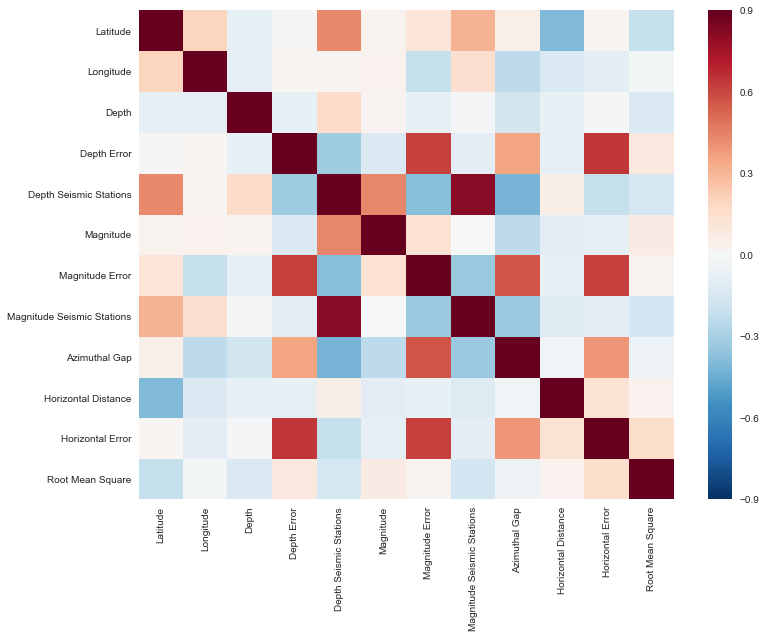

In [36]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9);

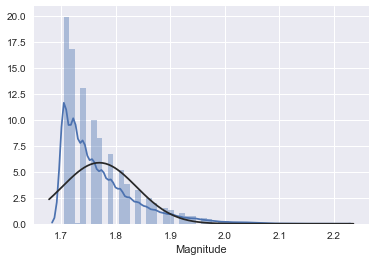

In [39]:
sns.distplot(np.log(data['Magnitude']),fit = norm)

# Histogram of Depth and it shows that it is rightly skewed.Most of the earthquakes have have depth less than 50

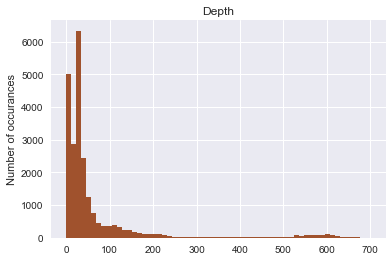

In [125]:
plt.hist(data['Depth'],color = 'sienna',align = 'mid',bins = 60)
plt.ylabel('Number of occurances')
plt.title('Depth')

In [ ]:
#Scatter plot between Depth Seismic stations and Magnitude and the variables have been normalized. p is veryless . 
#So, the relation is significant and R coefficient is 0.41 


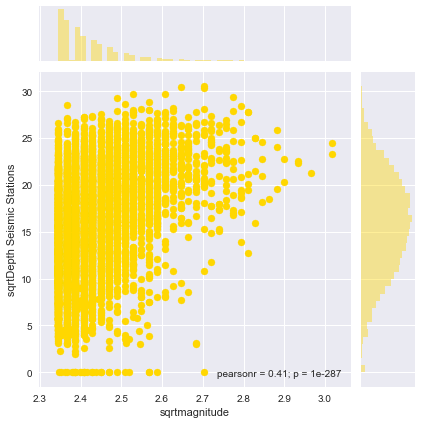

In [8]:
data['sqrtmagnitude']=np.sqrt(data['Magnitude'])
data['sqrtDepth Seismic Stations']=np.sqrt(data['Depth Seismic Stations'])
sns.jointplot(data['sqrtmagnitude'],data['sqrtDepth Seismic Stations'],color='gold');

# Creating a new variable hour from Time variable and converting it into String..

In [10]:
data['hour']=data['Time'].astype(str).str[:2]
data['hour']

0        13
1        11
2        18
3        18
4        13
5        13
6        13
7        23
8        11
9        10
10       20
11       00
12       09
13       05
14       15
15       03
16       05
17       06
18       06
19       06
20       07
21       07
22       07
23       07
24       08
25       08
26       08
27       12
28       12
29       14
         ..
23382    17
23383    02
23384    21
23385    11
23386    10
23387    11
23388    11
23389    05
23390    06
23391    06
23392    09
23393    11
23394    13
23395    04
23396    10
23397    12
23398    20
23399    00
23400    16
23401    01
23402    03
23403    14
23404    14
23405    23
23406    08
23407    08
23408    09
23409    12
23410    22
23411    20
Name: hour, Length: 23412, dtype: object

## Exploring the Type variable and here, value_counts is used to determine the count of each type of disaster

In [9]:
data['Type'].value_counts()

Earthquake           23232
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: Type, dtype: int64

## Line plot shows the most of the earthquakes occured at 13:00 , 06:00, 11:00 and 01:00 hours time 

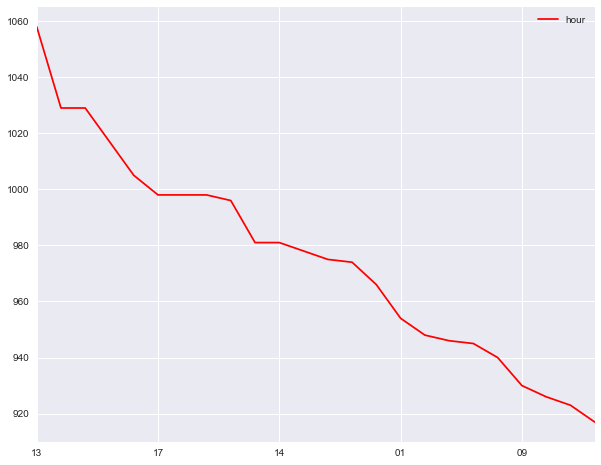

In [10]:
df = pd.DataFrame(data['hour'].value_counts())
df.plot(kind = 'line',figsize = (10,8),color = 'r')

In [7]:
data['Date'] = pd.to_datetime(data['Date'])

In [8]:
data['year'], data['month'] = data['Date'].dt.year, data['Date'].dt.month


## Using Datetime function-- creating a year column and a month column for further analysis

In [9]:
data.head(100)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,hour,year,month
0,1965-02-01,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,13,1965,2
1,1965-04-01,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,11,1965,4
2,1965-05-01,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,18,1965,5
3,1965-08-01,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,18,1965,8
4,1965-09-01,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,13,1965,9
5,1965-10-01,13:36:32,-13.405,166.629,Earthquake,35.0,NaN,NaN,6.7,MW,...,NaN,NaN,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic,13,1965,10
6,1965-12-01,13:32:25,27.357,87.867,Earthquake,20.0,NaN,NaN,5.9,MW,...,NaN,NaN,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic,13,1965,12
7,1965-01-15,23:17:42,-13.309,166.212,Earthquake,35.0,NaN,NaN,6.0,MW,...,NaN,NaN,ISCGEM861111,ISCGEM,ISCGEM,ISCGEM,Automatic,23,1965,1
8,1965-01-16,11:32:37,-56.452,-27.043,Earthquake,95.0,NaN,NaN,6.0,MW,...,NaN,NaN,ISCGEMSUP861125,ISCGEMSUP,ISCGEM,ISCGEM,Automatic,11,1965,1
9,1965-01-17,10:43:17,-24.563,178.487,Earthquake,565.0,NaN,NaN,5.8,MW,...,NaN,NaN,ISCGEM861148,ISCGEM,ISCGEM,ISCGEM,Automatic,10,1965,1


# Bar graph of the count of Nuclear explosion by year- and most of them occured in 70's and 80's

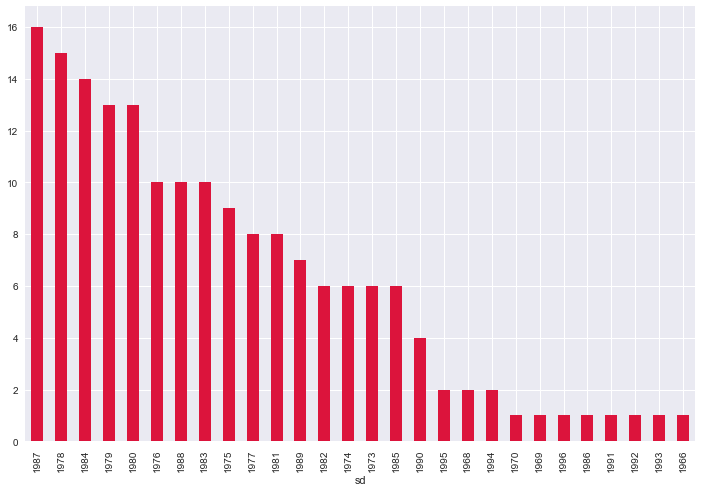

In [126]:
t = data[data['Type'] =='Nuclear Explosion']
t1=t['year'].value_counts()
f, ax = plt.subplots(figsize=(15, 9))
t1.plot(kind = 'bar',figsize = (12,8),color = 'crimson')
plt.xlabel('Year')
plt.ylabel('Count of Nuclear explosions')
plt.title('Count of Nuclear explosions by year')
plt.show()

## Table shows the count of disasters occured year wise.

In [51]:
df = pd.DataFrame(data['year'].value_counts())
df = df.rename(columns={'year': 'Total Disasters occured'})
df['Year'] = df.index.values
df

,Total Disasters occured,Year
2011,713,2011
2007,608,2007
1995,591,1995
2004,571,2004
2010,560,2010
2000,553,2000
1996,541,1996
1992,533,1992
2005,533,2005
1990,528,1990


## Bar graph of the count of disasters occured in each year. The Dark blue line shows the cut-off value as 450.It is the mean of the disasters occured. 
## We can infer that the number of earthquakes are increasing from 1995 till 2011 and then, the count has changed very largely.  

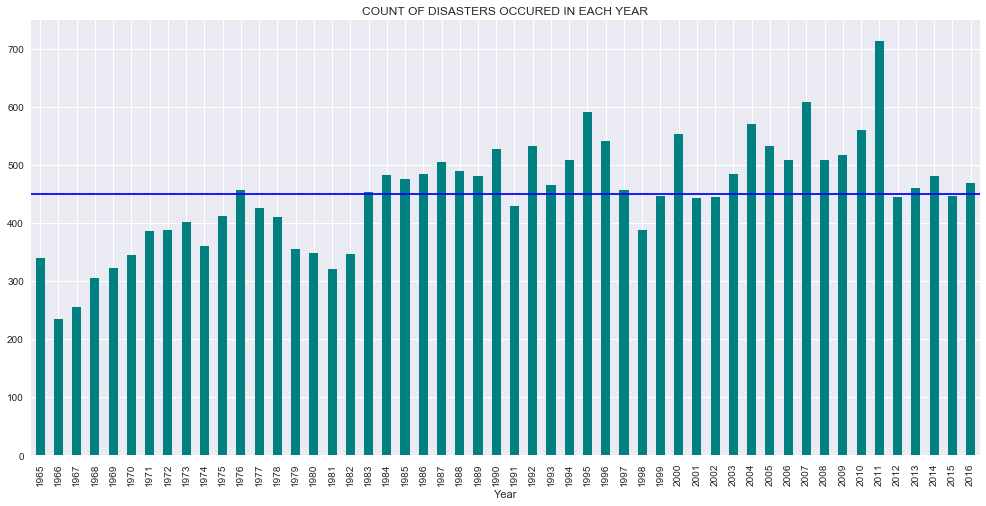

In [127]:
ax = plt.subplot()
ax.set_title('COUNT OF DISASTERS OCCURED IN EACH YEAR')
df.groupby('Year').mean()['Total Disasters occured'].plot(kind='bar',figsize=(17,8),color = 'teal')
ax.axhline(df['Total Disasters occured'].mean(), ls='-', color='b')

## Total Disasters occured group by Source. Most of the sources are US and ISCGEM

,Total Disasters occured,Source
US,20630,US
ISCGEM,2460,ISCGEM
ISCGEMSUP,120,ISCGEMSUP
CI,61,CI
GCMT,55,GCMT
NC,51,NC
AK,12,AK
OFFICIAL,8,OFFICIAL
UW,6,UW
NN,4,NN


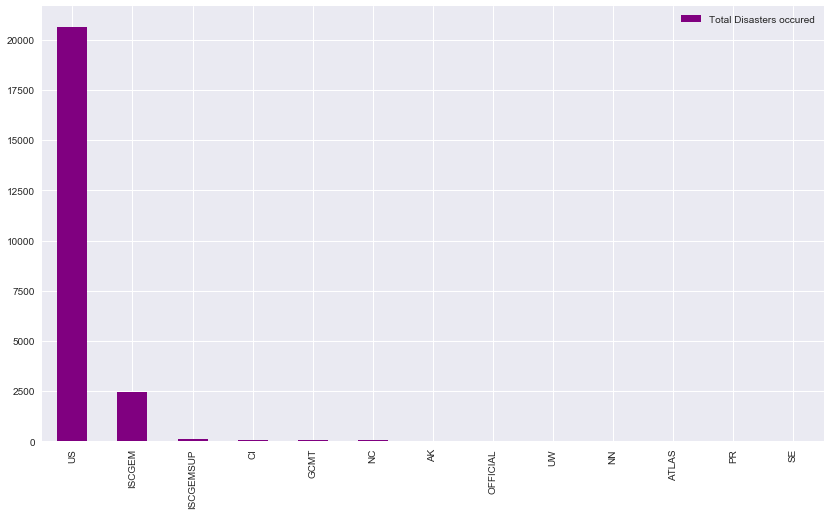

In [11]:
df1 = pd.DataFrame(data['Source'].value_counts())
df1 = df1.rename(columns={'Source': 'Total Disasters occured'})
df1['Source'] = df1.index.values
df1.plot(kind = 'bar',figsize = (14,8),color = 'purple')
df1

## Bar graph plot - The plot considers 3 categorical variables - Source , Type and Magnitude Source

Source     Type               Magnitude Source
AK         Earthquake         AK                     12
ATLAS      Earthquake         ATLAS                   3
CI         Earthquake         CI                     49
           Nuclear Explosion  CI                     12
GCMT       Earthquake         GCMT                   55
ISCGEM     Earthquake         ISCGEM               2460
ISCGEMSUP  Earthquake         ISCGEM                120
NC         Earthquake         NC                     51
NN         Earthquake         NN                      4
OFFICIAL   Earthquake         OFFICIAL                8
PR         Earthquake         PR                      1
SE         Earthquake         SE                      1
US         Earthquake         1000                    3
                              1009                    1
                              1020                    1
                              1023                    1
                              BRK                     2
 

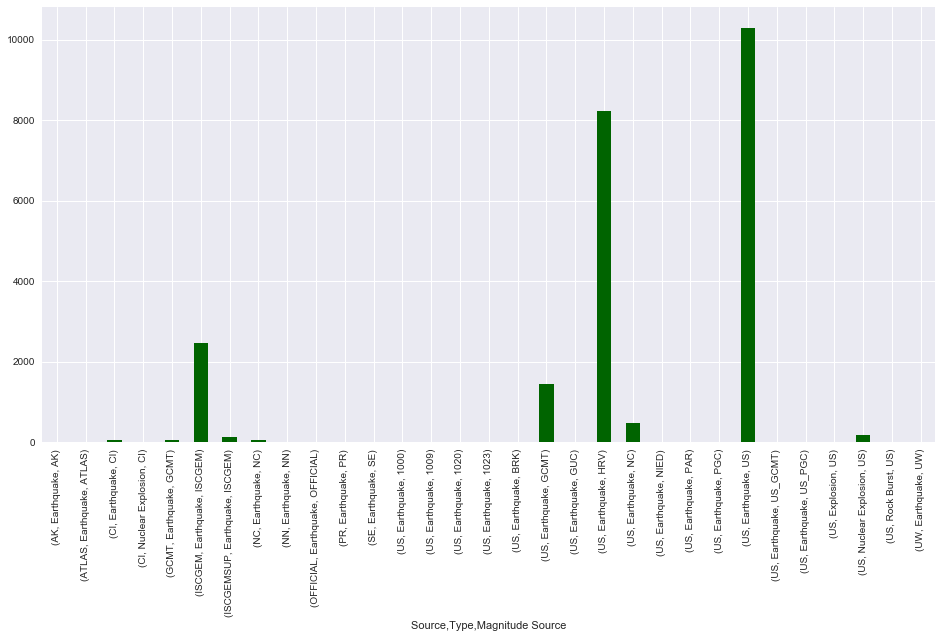

In [65]:
x = data.groupby(['Source', 'Type','Magnitude Source']).size()
x.plot(kind = 'bar',figsize = (16,8),color = 'darkgreen')
x

In [ ]:
## Scatter plot between 2 variables -> Depth and Magnitude. However, there is no relation between two variables.

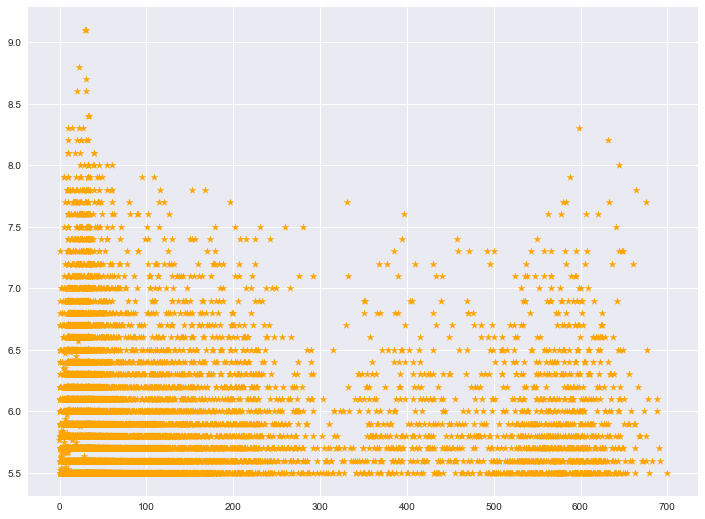

In [43]:
f, ax = plt.subplots(figsize=(12, 9))
plt.scatter('Depth','Magnitude',data = data,color = 'orange',marker = '*')
plt.xlabel('Depth')
plt.ylabel('Magnitude')
plt.title('Bi-variate analysis between Depth and Magnitude.')
plt.show()

In [ ]:
##Using describe function for analysis of all the attributes of the data. 

In [44]:
#depth variable   -outlier
#magnitude error mei missing values zyadaa
#azimuthal gap - outlier
#horiz err, depth err. - outliers
data.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
Date                          23412 non-null object
Time                          23412 non-null object
Latitude                      23412 non-null float64
Longitude                     23412 non-null float64
Type                          23412 non-null object
Depth                         23412 non-null float64
Depth Error                   4461 non-null float64
Depth Seismic Stations        7097 non-null float64
Magnitude                     23412 non-null float64
Magnitude Type                23409 non-null object
Magnitude Error               327 non-null float64
Magnitude Seismic Stations    2564 non-null float64
Azimuthal Gap                 7299 non-null float64
Horizontal Distance           1604 non-null float64
Horizontal Error              1156 non-null float64
Root Mean Square              17352 non-null float64
ID                            23412 non-null object
Sou

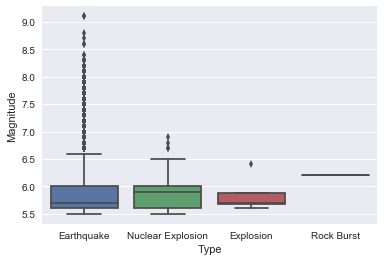

In [49]:
sns.boxplot(x = "Type", y = "Magnitude",data = data)